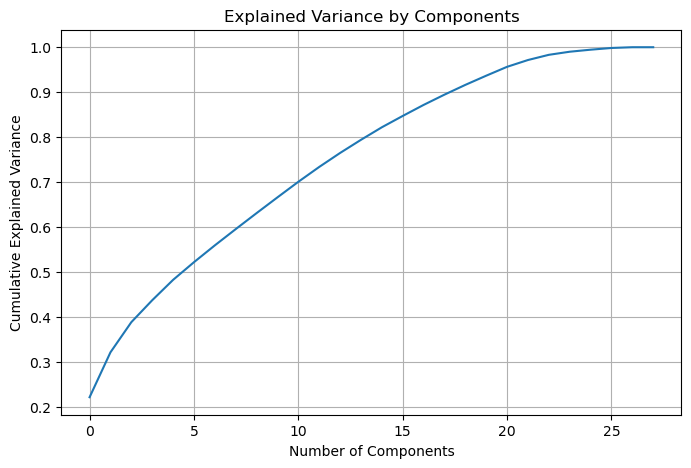

Optimal number of PCA components to retain ~95% variance: 21
Accuracy: 0.795

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       302
           1       0.84      0.88      0.86       698

    accuracy                           0.80      1000
   macro avg       0.76      0.74      0.75      1000
weighted avg       0.79      0.80      0.79      1000



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_excel(r"C:\Users\HP\Desktop\Customer Churn Analysis\Data\Prediction_Data.xlsx")

df.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason'], inplace=True)

df = df.fillna(df.median(numeric_only=True)) 
df = df.fillna("Unknown")

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop("Customer_Status", axis=1)
y = df["Customer_Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of PCA components to retain ~95% variance: {n_components}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

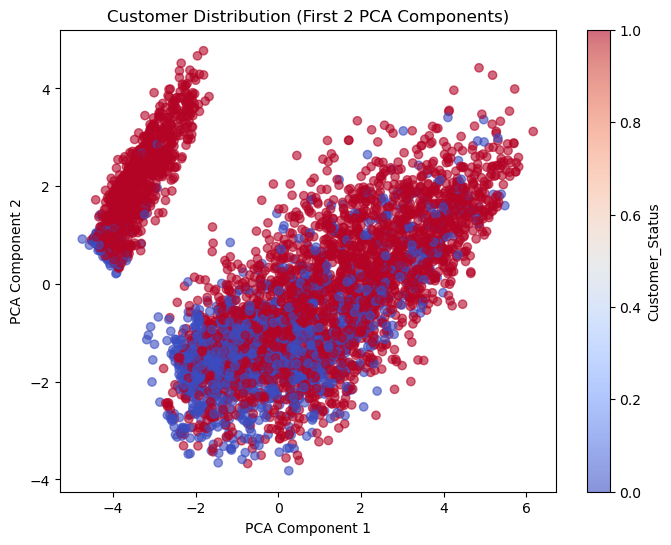

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Distribution (First 2 PCA Components)')
plt.colorbar(label='Customer_Status')
plt.show()

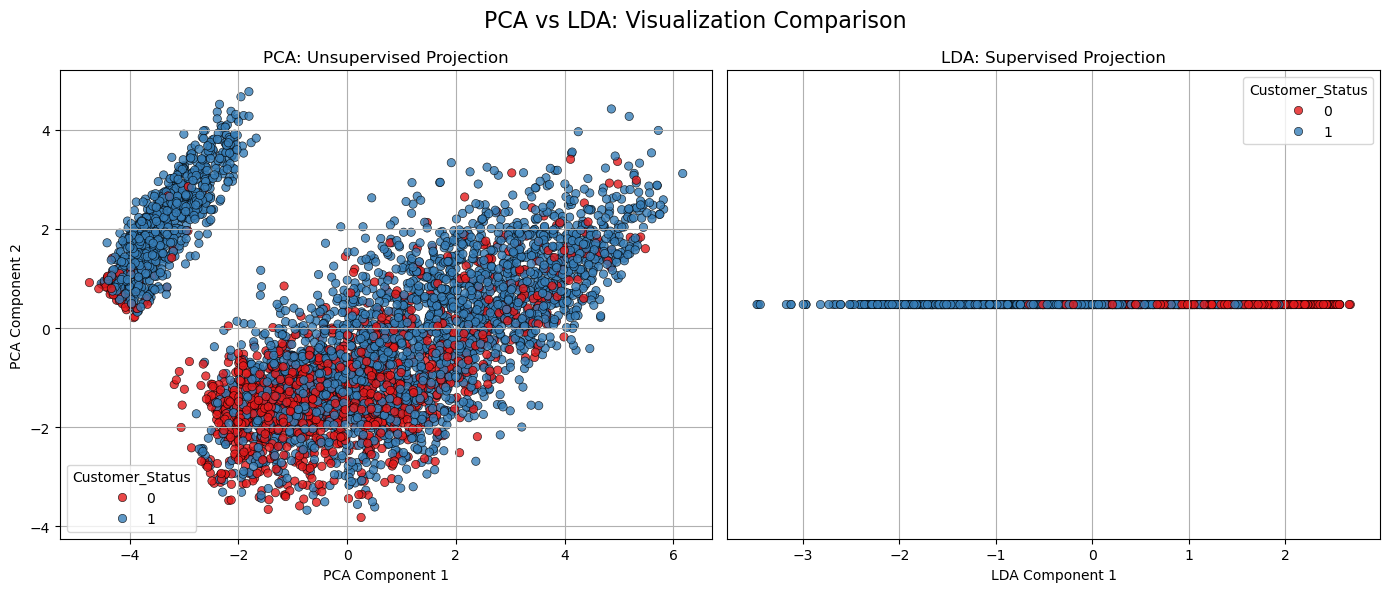

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

df = pd.read_excel(r"C:\Users\HP\Desktop\Customer Churn Analysis\Data\Prediction_Data.xlsx")

df.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason'], inplace=True)

df = df.fillna(df.median(numeric_only=True))
df = df.fillna("Unknown")

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop("Customer_Status", axis=1)
y = df["Customer_Status"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LDA(n_components=1)  # LDA components are always <= (n_classes - 1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', edgecolor='k', alpha=0.8)
plt.title('PCA: Unsupervised Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='Set1', edgecolor='k', alpha=0.8)
plt.title('LDA: Supervised Projection')
plt.xlabel('LDA Component 1')
plt.yticks([]) 
plt.grid()

plt.suptitle('PCA vs LDA: Visualization Comparison', fontsize=16)
plt.tight_layout()
plt.show()